<a href='http://www.scienceacademy.ca'> <img style="float: left;height:70px" src="Log_SA.jpeg"></a>

# Support Vector Machines (SVMs) using scikit-learn in Python - Project Solutions
### Let's tain and deploy SVMs on another dataset from UCI Machine Learning Repository 
### [Statlog (Australian Credit Approval) Data Set ](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29)<br>

This real dataset concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. <br>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read the datafile and display the head of your dataframe**

In [2]:
df=pd.read_csv("Desktop/Aust_Credit_Approval_Data.csv")
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,target
0,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 14 columns):
x1        690 non-null float64
x2        690 non-null float64
x3        690 non-null int64
x4        690 non-null int64
x5        690 non-null int64
x6        690 non-null float64
x7        690 non-null int64
x8        690 non-null int64
x9        690 non-null int64
x10       690 non-null int64
x11       690 non-null int64
x12       690 non-null int64
x13       690 non-null int64
target    690 non-null int64
dtypes: float64(3), int64(11)
memory usage: 75.5 KB


In [4]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,target
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


## EDA
The features are hidden and renamed with some x1 to x13. We can do the pair plot but this would be big!. Let's do some assumptions and explore the data. 


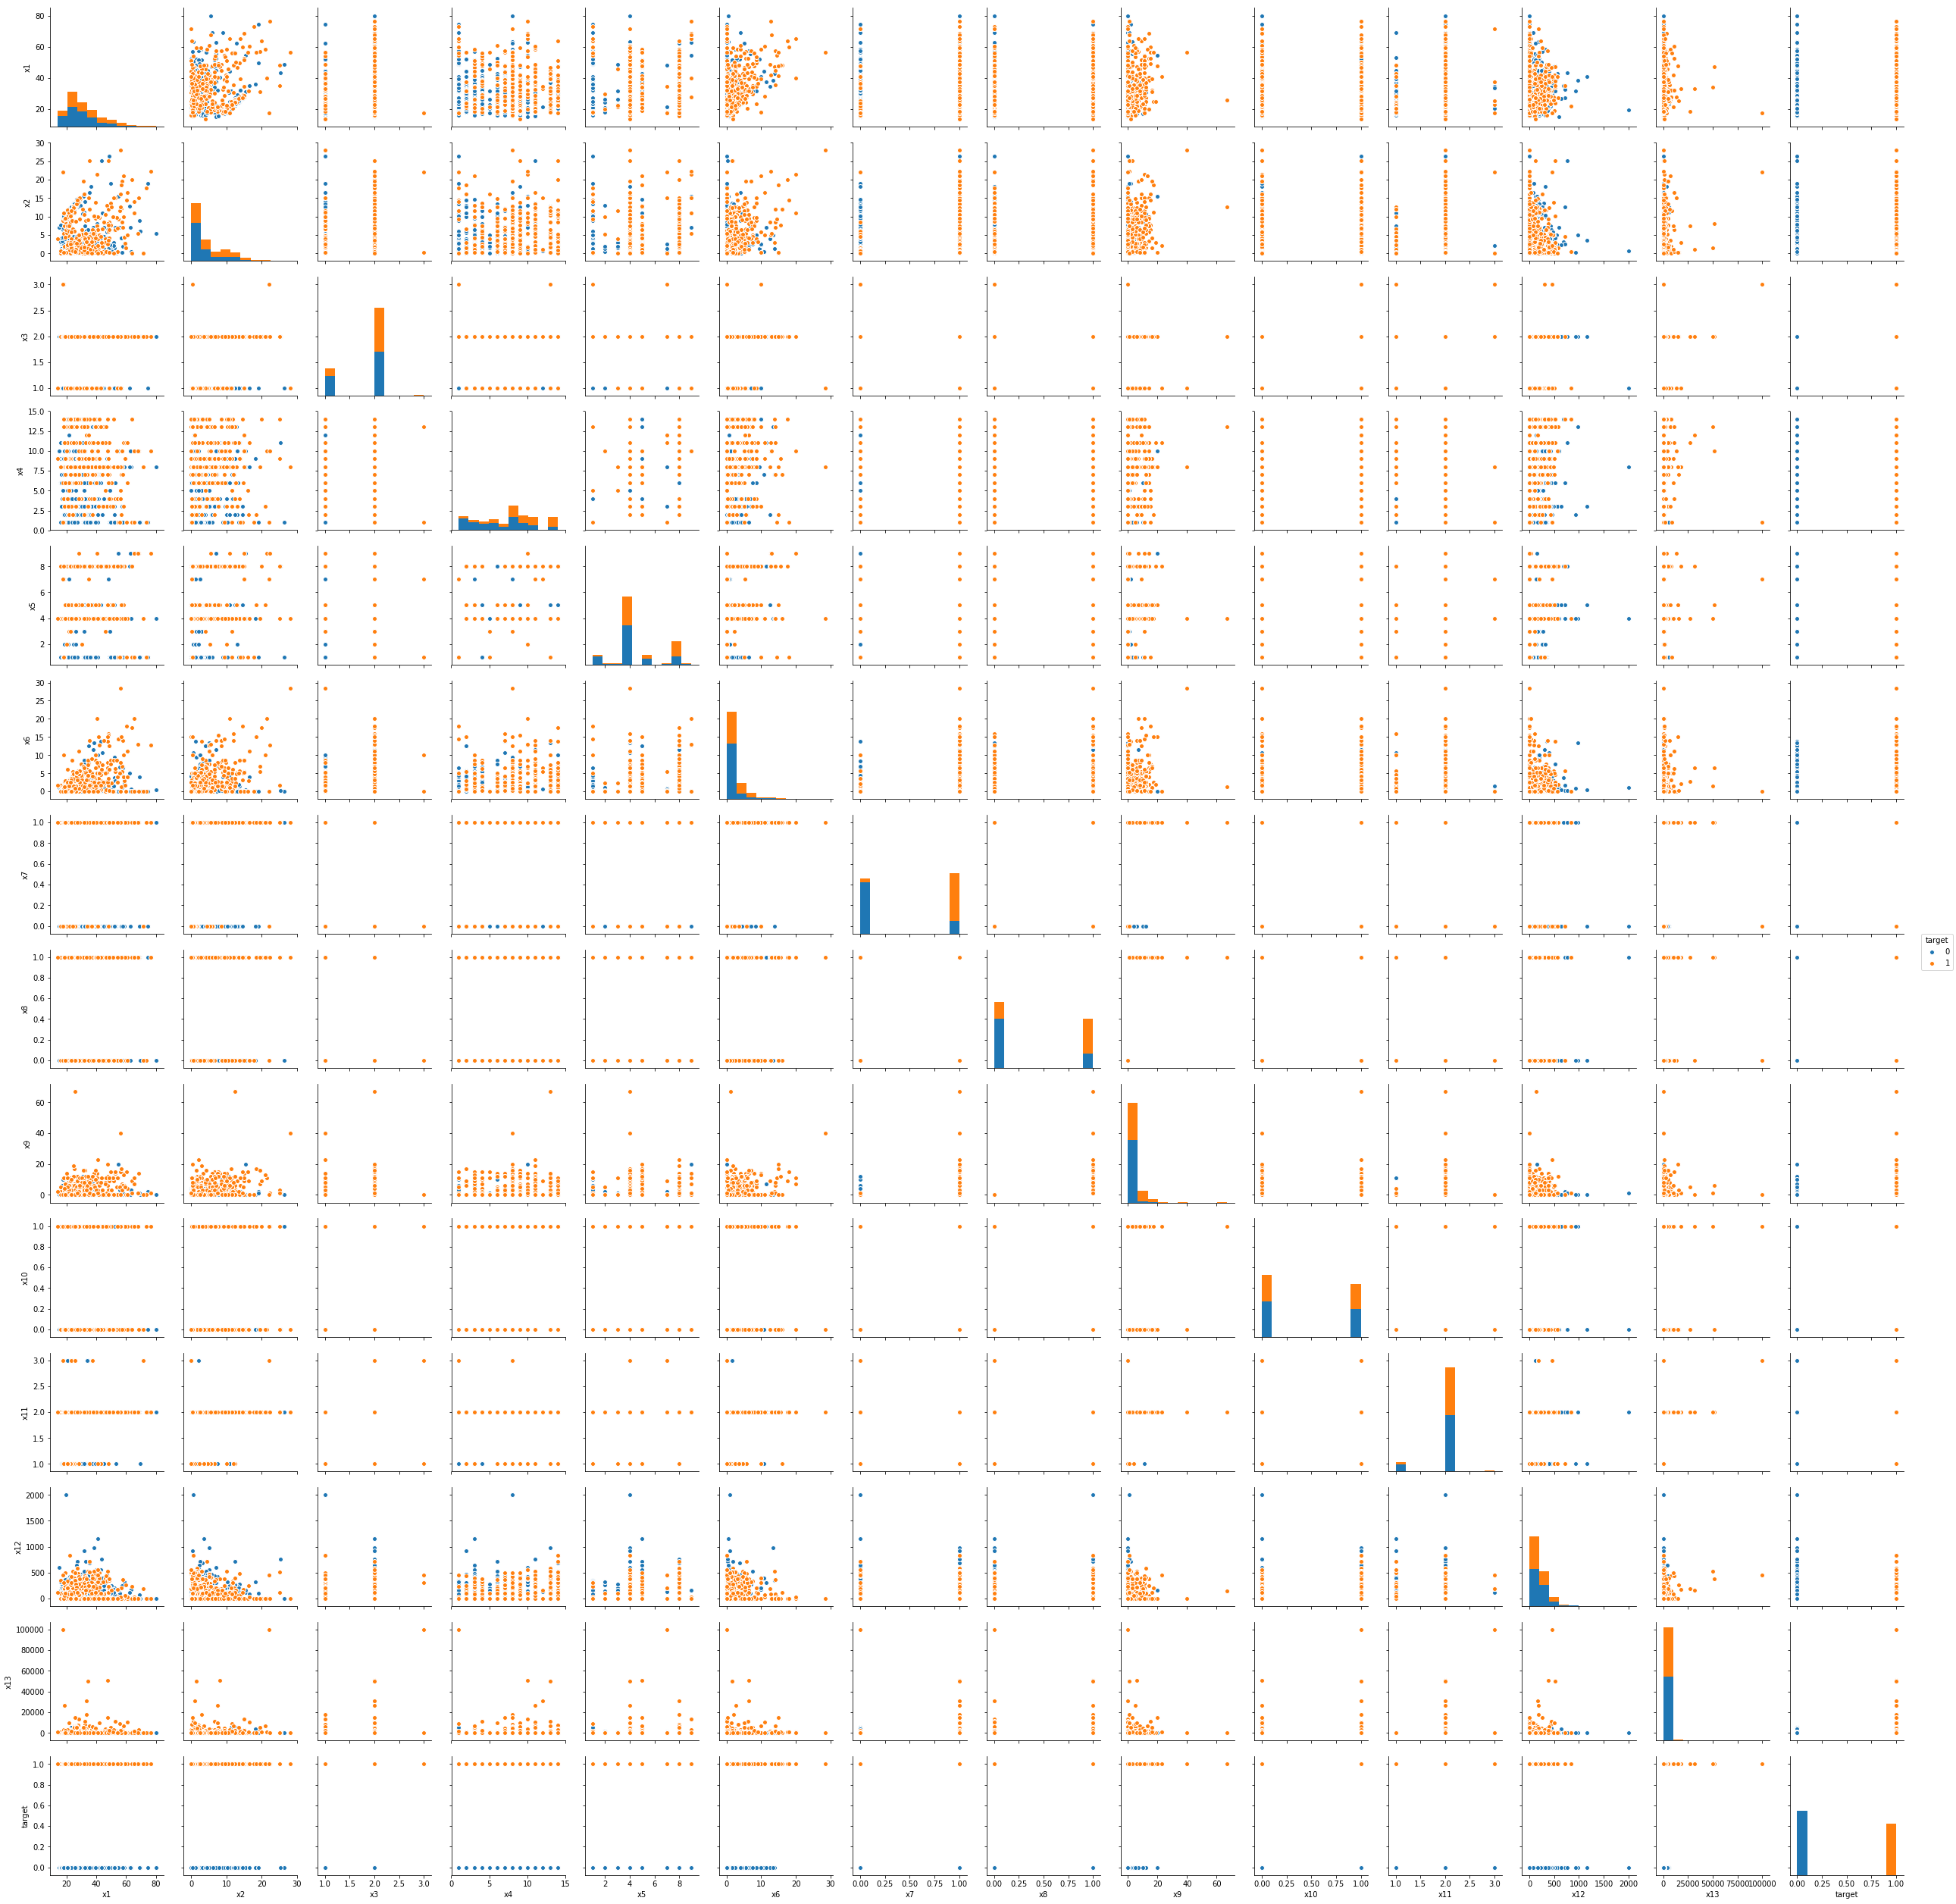

In [5]:
sns.pairplot(df, hue='target')

**How many persons could not get approval?**

In [6]:
df['target'].value_counts()

0    383
1    307
Name: target, dtype: int64

**Considering x8 as a sex (male 1 and female 0), which sex have better chances for credit approval? Re-create the plot below.**

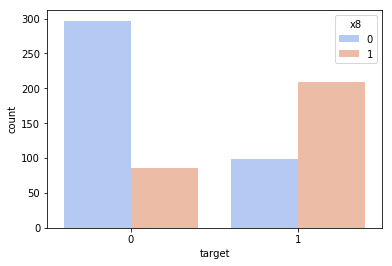

In [7]:
sns.countplot(x='target', data=df, hue = 'x8',palette='coolwarm')

**Considering x4 as a credit score, which score is the highest number of counts? re-create the plot below**

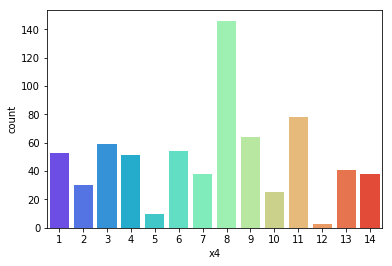

In [8]:
#df['x4'].value_counts()
sns.countplot(x='x4', data=df, palette='rainbow')

**Once again, with our assumptions: x8:sex and x4:credit score, what is the probability for male and female to get approved if the score is greater than 7? Create a count plot please**

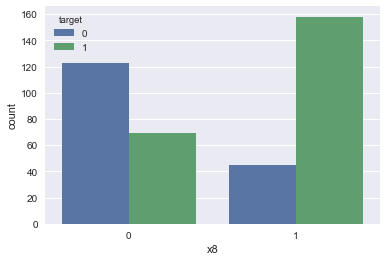

In [16]:
sns.countplot(x='x8', data=df[df['x4']>7], hue = 'target')#,palette='coolwarm')

**Looks like x1 is age, let's assume it is, What age is the common for people to apply for credit?** Create the plot belwo.

Text(0.5,0,u'Age')

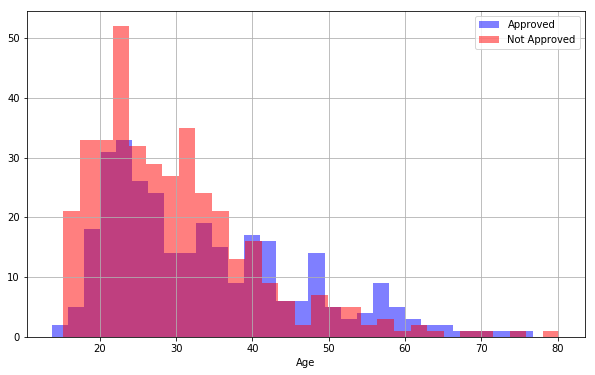

In [9]:
plt.figure(figsize=(10,6))
df[df['target']==1]['x1'].hist(alpha=0.5,color='blue',bins=30,label='Approved')
df[df['target']==0]['x1'].hist(alpha=0.5,color='red',bins=30,label='Not Approved')
plt.legend()
plt.xlabel('Age')

**Considering, x12 is amount in thousands, how x1 and x12 are relation, create a joint plot**

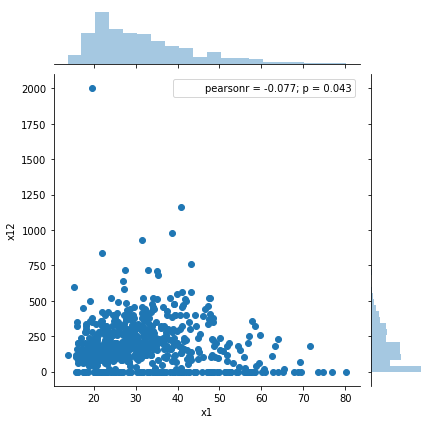

In [10]:
sns.jointplot(data=df, x='x1',y='x12')

Let's move on to machine learning. 
## Machine Learning 

** Do the train test split, use default values of test_size .30 and random state at the moment**

In [11]:
from sklearn.model_selection import train_test_split
X = df.drop('target', axis = 1)
y = df['target']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

### Importing and  training the Support Vector Classifier

**Importing SVC and create its instance `svm_model`**

In [13]:
from sklearn.svm import SVC
svm_model = SVC()

**train the model model please** 

In [14]:
svm_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

**Do the predictions please** 

In [15]:
predictions = svm_model.predict(X_test)

**How the Classification report and Confusion matrix looks like?**

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[134   3]
 [ 88   3]]
             precision    recall  f1-score   support

          0       0.60      0.98      0.75       137
          1       0.50      0.03      0.06        91

avg / total       0.56      0.60      0.47       228



### Gridsearch

In [18]:
param_grid = {'C': [0.01,0.1, 10, 100, 1000],
              'gamma': [1,0.1,0.01,0.001,0.0001]}

**parameter's values are given in `param_grid`, Do the gridsearch to find optimum value of C and gamma** Please don't use vebrose at the moment!

In [19]:
# We need to import GridSearchCV from model_selection
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), param_grid)
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

**You may want to know the best values of your parameters!**

In [21]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001}

**Do the predictions using best values of your parameters and print confusion matrix and the classification report.**

In [22]:
grid_predictions = grid.predict(X_test)

In [23]:
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[115  22]
 [ 35  56]]
             precision    recall  f1-score   support

          0       0.77      0.84      0.80       137
          1       0.72      0.62      0.66        91

avg / total       0.75      0.75      0.75       228



The model is improved after GridSearch but the prediction are not great. 
# Excellent work!